In [1]:
import sys
import tensorflow as tf
import numpy as np

sys.path.append('../usr/lib/eval-utils-nih')

import eval_utils_nih as eu

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 2156)              54091884  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2156)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1280)              2760960   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0

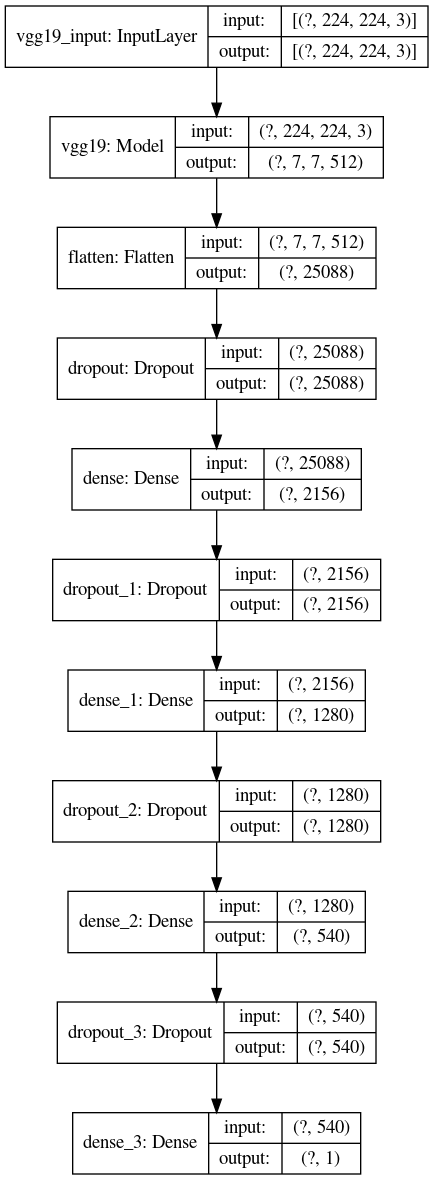

In [2]:
model = eu.load_model('../input/model-training-model-1', 'model.h5')

model.summary()

tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [3]:
data_dir = '../input/chest-xray-pneumonia/chest_xray'
train_dir_name = 'train'
test_dir_name = 'test'
valid_dir_name = 'val'
classes = ['NORMAL', 'PNEUMONIA']

In [4]:
train_generator, valid_generator, test_generator = \
    eu.generate_datasets(
        data_dir, 
        train_dir_name, 
        test_dir_name, 
        None,
        valid_dir_name
    )

Found 624 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [5]:
eu.evaludate_model_n_print_loss_n_acc(model, train_generator)

163/163 [==============================] - 64s 394ms/step - loss: 0.6124 - accuracy: 0.6637

Loss: 0.612
Accuracy: 66.373%


In [6]:
eu.evaludate_model_n_print_loss_n_acc(model, valid_generator)

1/1 [==============================] - 0s 1ms/step - loss: 0.6614 - accuracy: 0.5625

Loss: 0.661
Accuracy: 56.250%


In [7]:
eu.evaludate_model_n_print_loss_n_acc(model, test_generator)

20/20 [==============================] - 6s 319ms/step - loss: 0.5746 - accuracy: 0.7131

Loss: 0.575
Accuracy: 71.314%


In [8]:
train_preds = model.predict(train_generator, verbose=1)

163/163 [==============================] - 54s 334ms/step


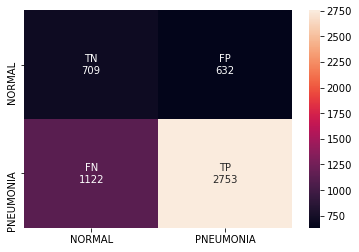

In [9]:
eu.draw_confusion_matrix_by_data_generator_n_predictions(
    train_generator,
    np.rint(train_preds),
    classes,
    cmap=None
)

In [10]:
eu.generate_classification_report(
    train_generator,
    np.rint(train_preds),
    classes
)

Classification Report
              precision    recall  f1-score   support

      NORMAL       0.39      0.53      0.45      1341
   PNEUMONIA       0.81      0.71      0.76      3875

    accuracy                           0.66      5216
   macro avg       0.60      0.62      0.60      5216
weighted avg       0.70      0.66      0.68      5216



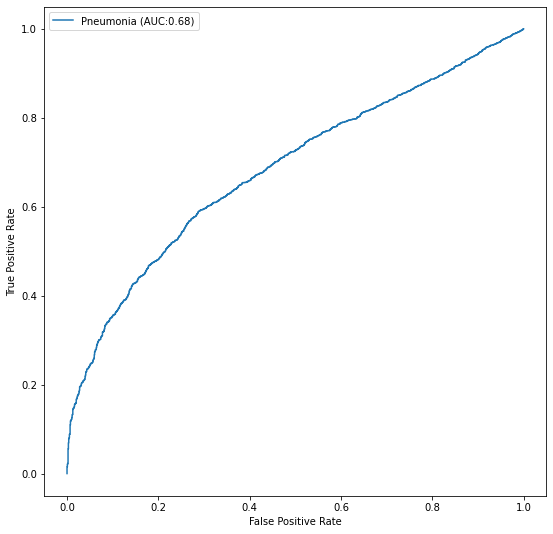

In [11]:
eu.plot_roc_curve(train_generator.classes, train_preds)

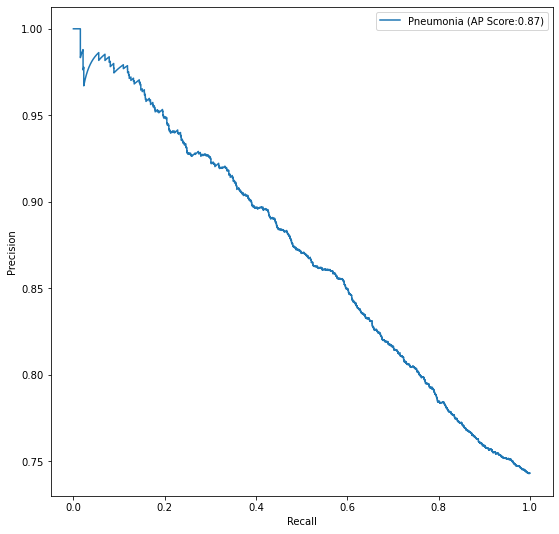

In [12]:
eu.plot_precision_recall_curve(train_generator.classes, train_preds)

In [13]:
data_dir = '../input/chest-xray-covid19-pneumonia/Data'

train_generator, _, test_generator = \
    eu.generate_datasets(
        data_dir, 
        train_dir_name, 
        test_dir_name, 
        classes,
        valid_dir_name
    )

Found 1172 images belonging to 2 classes.
Found 4684 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [14]:
eu.evaludate_model_n_print_loss_n_acc(model, train_generator)

147/147 [==============================] - 54s 370ms/step - loss: 0.6123 - accuracy: 0.6682

Loss: 0.612
Accuracy: 66.823%


In [15]:
eu.evaludate_model_n_print_loss_n_acc(model, test_generator)

37/37 [==============================] - 14s 382ms/step - loss: 0.5936 - accuracy: 0.6706

Loss: 0.594
Accuracy: 67.065%


In [16]:
train_preds = model.predict(train_generator, verbose=1)

147/147 [==============================] - 47s 322ms/step


In [17]:
test_preds = model.predict(test_generator, verbose=1)

37/37 [==============================] - 12s 322ms/step


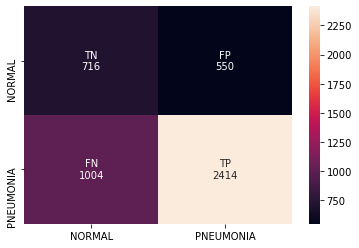

In [18]:
eu.draw_confusion_matrix_by_data_generator_n_predictions(
    train_generator,
    np.rint(train_preds),
    classes,
    cmap=None
)

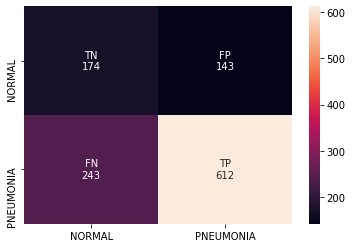

In [19]:
eu.draw_confusion_matrix_by_data_generator_n_predictions(
    test_generator,
    np.rint(test_preds),
    classes,
    cmap=None
)

In [20]:
eu.generate_classification_report(
    train_generator,
    np.rint(train_preds),
    classes
)

Classification Report
              precision    recall  f1-score   support

      NORMAL       0.42      0.57      0.48      1266
   PNEUMONIA       0.81      0.71      0.76      3418

    accuracy                           0.67      4684
   macro avg       0.62      0.64      0.62      4684
weighted avg       0.71      0.67      0.68      4684



In [21]:
eu.generate_classification_report(
    test_generator,
    np.rint(test_preds),
    classes
)


Classification Report
              precision    recall  f1-score   support

      NORMAL       0.42      0.55      0.47       317
   PNEUMONIA       0.81      0.72      0.76       855

    accuracy                           0.67      1172
   macro avg       0.61      0.63      0.62      1172
weighted avg       0.70      0.67      0.68      1172



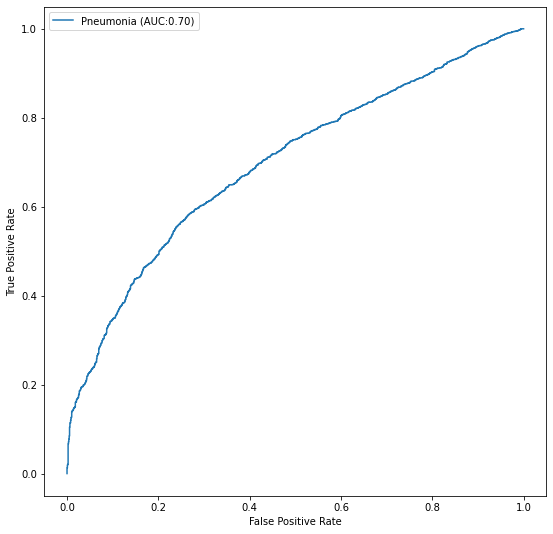

In [22]:
eu.plot_roc_curve(train_generator.classes, train_preds)

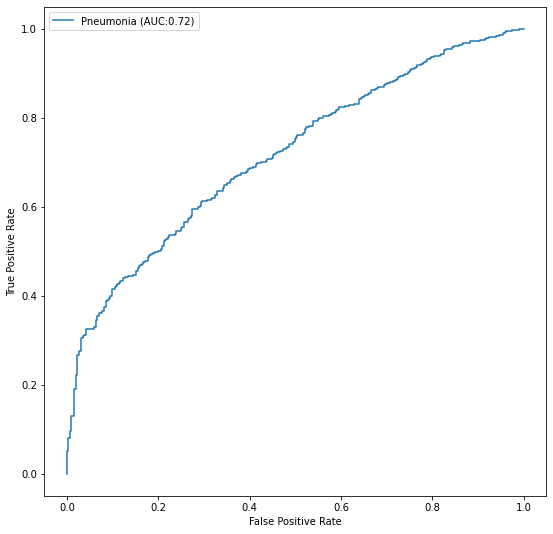

In [23]:
eu.plot_roc_curve(test_generator.classes, test_preds)

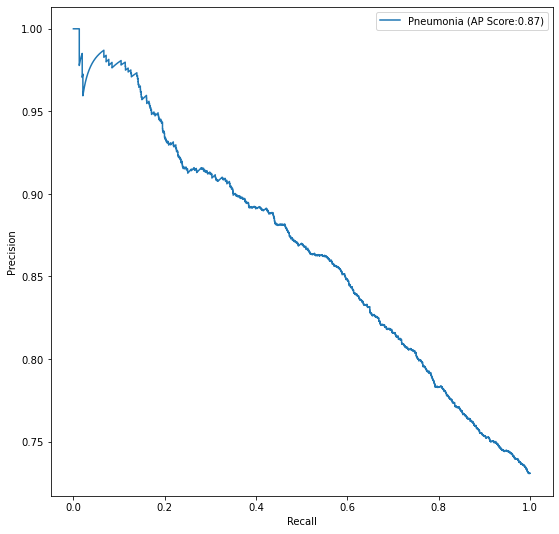

In [24]:
eu.plot_precision_recall_curve(train_generator.classes, train_preds)

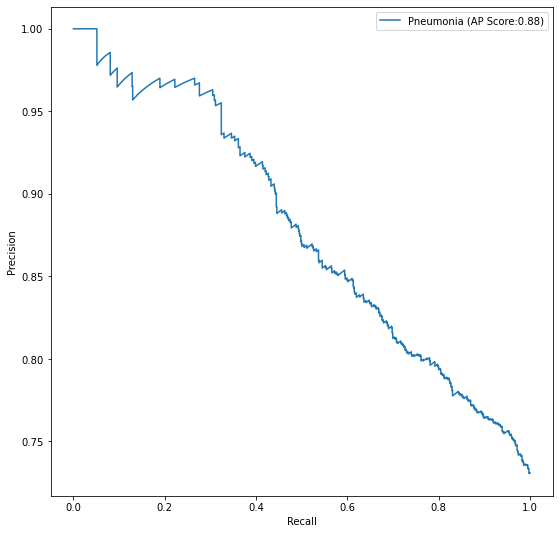

In [25]:
eu.plot_precision_recall_curve(test_generator.classes, test_preds)

In [26]:
data_dir = '../input/chest-xray-covid19-pneumonia/Data'
classes = ['COVID19', 'PNEUMONIA']

train_generator, _, test_generator = \
    eu.generate_datasets(
        data_dir, 
        train_dir_name, 
        test_dir_name, 
        classes,
        valid_dir_name
    )

Found 971 images belonging to 2 classes.
Found 3878 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [27]:
eu.evaludate_model_n_print_loss_n_acc(model, train_generator)

122/122 [==============================] - 42s 344ms/step - loss: 0.6015 - accuracy: 0.6916

Loss: 0.601
Accuracy: 69.159%


In [28]:
eu.evaludate_model_n_print_loss_n_acc(model, test_generator)

31/31 [==============================] - 10s 333ms/step - loss: 0.5764 - accuracy: 0.7065

Loss: 0.576
Accuracy: 70.649%


In [29]:
train_preds = model.predict(train_generator, verbose=1)

122/122 [==============================] - 40s 329ms/step


In [30]:
test_preds = model.predict(test_generator, verbose=1)

31/31 [==============================] - 10s 327ms/step


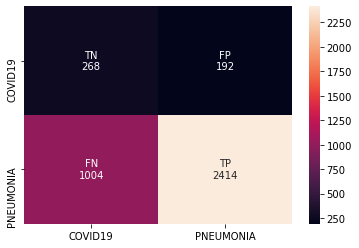

In [31]:
eu.draw_confusion_matrix_by_data_generator_n_predictions(
    train_generator,
    np.rint(train_preds),
    classes,
    cmap=None
)

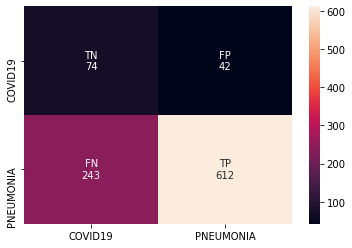

In [32]:
eu.draw_confusion_matrix_by_data_generator_n_predictions(
    test_generator,
    np.rint(test_preds),
    classes,
    cmap=None
)

In [33]:
eu.generate_classification_report(
    train_generator,
    np.rint(train_preds),
    classes
)

Classification Report
              precision    recall  f1-score   support

     COVID19       0.21      0.58      0.31       460
   PNEUMONIA       0.93      0.71      0.80      3418

    accuracy                           0.69      3878
   macro avg       0.57      0.64      0.56      3878
weighted avg       0.84      0.69      0.74      3878



In [34]:
eu.generate_classification_report(
    test_generator,
    np.rint(test_preds),
    classes
)


Classification Report
              precision    recall  f1-score   support

     COVID19       0.23      0.64      0.34       116
   PNEUMONIA       0.94      0.72      0.81       855

    accuracy                           0.71       971
   macro avg       0.58      0.68      0.58       971
weighted avg       0.85      0.71      0.76       971



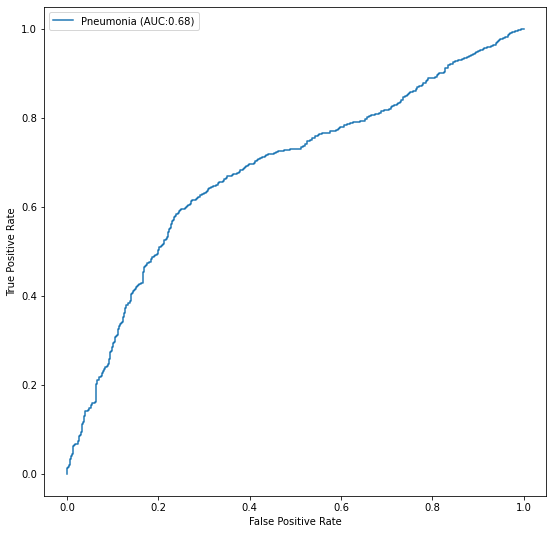

In [35]:
eu.plot_roc_curve(train_generator.classes, train_preds)

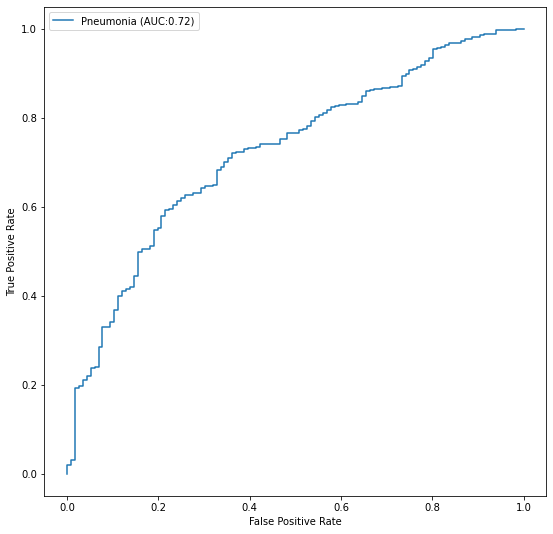

In [36]:
eu.plot_roc_curve(test_generator.classes, test_preds)

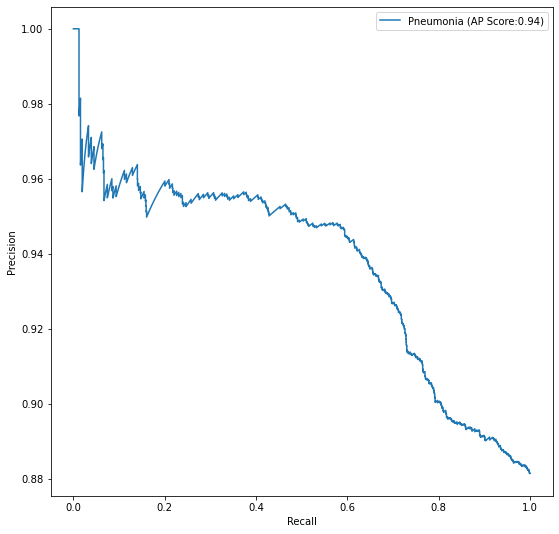

In [37]:
eu.plot_precision_recall_curve(train_generator.classes, train_preds)

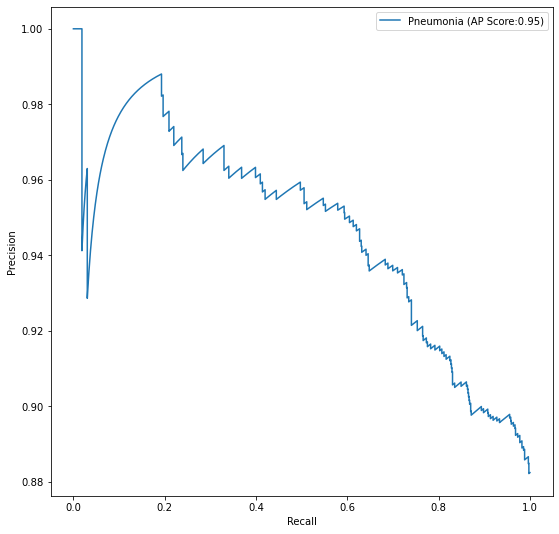

In [38]:
eu.plot_precision_recall_curve(test_generator.classes, test_preds)